
Itinéraire : ville du pont -> voujeaucourt
Chemin le plus court :
ville du pont -> voujeaucourt : 0.55 (Distance cumulée : 0.55)
Distance totale : 0.55

Distance totale de l'itinéraire : 0.55


Itinéraire : ville du pont -> montbéliard -> voujeaucourt
Ville 'montbéliard' introuvable dans le graphe.
Itinéraire incomplet.


Itinéraire : sochaux -> audincourt -> voujeaucourt
Ville 'sochaux' introuvable dans le graphe.
Itinéraire incomplet.


Itinéraire : ville du pont -> sochaux -> montbéliard -> voujeaucourt
Ville 'sochaux' introuvable dans le graphe.
Itinéraire incomplet.


Itinéraire : exincourt -> voujeaucourt -> montbéliard
Ville 'exincourt' introuvable dans le graphe.
Itinéraire incomplet.



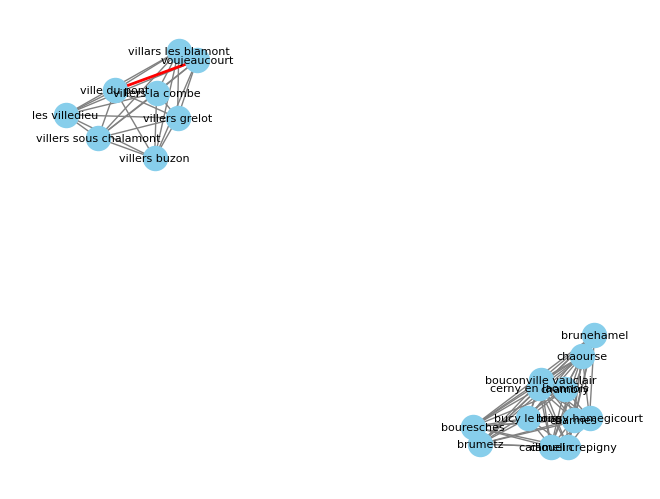

In [12]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

city_data_file = '../dataset/cities.csv'

def create_graph(city_data_file):
    """Crée un graphe à partir des 100 premières lignes du fichier de données des villes."""
    graph = nx.Graph()
    df = pd.read_csv(city_data_file, nrows=20)
    
    # Ajouter des noeuds pour chaque ville
    for _, row in df.iterrows():
        graph.add_node(row['label'], pos=(row['latitude'], row['longitude']))
    
    # Connecte les villes dans le même département ou à moins de 0.5 degrés de distance
    for _, city1 in df.iterrows():
        for _, city2 in df.iterrows():
            if city1['label'] != city2['label']:
                lat1, lon1 = city1['latitude'], city1['longitude']
                lat2, lon2 = city2['latitude'], city2['longitude']
                distance = ((lat2 - lat1)**2 + (lon2 - lon1)**2) ** 0.5
                
                # Connecter si dans le même département ou distance < 0.5
                if city1['department_name'] == city2['department_name'] or distance < 0.5:
                    graph.add_edge(city1['label'], city2['label'], weight=distance)
    
    return graph

def dijkstra(graph, start, target):
    """Implémente l'algorithme de Dijkstra pour trouver le chemin le plus court."""
    try:
        path = nx.dijkstra_path(graph, start, target, weight='weight')
        length = nx.dijkstra_path_length(graph, start, target, weight='weight')
        return path, length
    except nx.NetworkXNoPath:
        return None, None

def print_path_details(graph, path):
    """Affiche le chemin avec la distance cumulée à chaque étape."""
    if path:
        total_distance = 0
        print("Chemin le plus court :")
        for i in range(len(path) - 1):
            start = path[i]
            end = path[i + 1]
            # Récupère le poids (distance) de l'arête entre deux villes consécutives
            distance = graph.edges[start, end]['weight']
            total_distance += distance
            print(f"{start} -> {end} : {distance:.2f} (Distance cumulée : {total_distance:.2f})")
        print(f"Distance totale : {total_distance:.2f}\n")
    else:
        print("Aucun chemin trouvé.")

def draw_graph(graph, paths):
    """Affiche le graphe avec les positions des villes et les chemins en couleur."""
    pos = nx.get_node_attributes(graph, 'pos')
    nx.draw(graph, pos, with_labels=True, node_size=300, font_size=8, node_color="skyblue", edge_color="gray")
    
    # Coloration des différents chemins pour distinguer les itinéraires
    colors = ["red", "green", "blue", "purple", "orange"]
    for i, path_edges in enumerate(paths):
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color=colors[i % len(colors)], width=2)
    plt.show()

# Création du graphe
graph = create_graph(city_data_file)

# Définition des itinéraires à tester avec escales
itineraries = [
    ["ville du pont", "voujeaucourt"],
    ["ville du pont", "montbéliard", "voujeaucourt"],
    ["sochaux", "audincourt", "voujeaucourt"],
    ["ville du pont", "sochaux", "montbéliard", "voujeaucourt"],
    ["exincourt", "voujeaucourt", "montbéliard"]
]

# Liste pour stocker les chemins à tracer
paths_to_draw = []

# Exécution des tests pour chaque itinéraire
for itinerary in itineraries:
    print(f"\nItinéraire : {' -> '.join(itinerary)}")
    cumulative_path = []
    total_distance = 0
    valid_itinerary = True
    
    # Vérifier si chaque ville dans l'itinéraire existe dans le graphe
    for city in itinerary:
        if city not in graph:
            print(f"Ville '{city}' introuvable dans le graphe.")
            valid_itinerary = False
            break
    
    if not valid_itinerary:
        print("Itinéraire incomplet.\n")
        continue

    # Parcours de chaque étape dans l'itinéraire
    for i in range(len(itinerary) - 1):
        start_city = itinerary[i]
        target_city = itinerary[i + 1]
        
        # Recherche du chemin et affichage des détails
        path, length = dijkstra(graph, start_city, target_city)
        if path:
            print_path_details(graph, path)
            cumulative_path.extend(path) if not cumulative_path else cumulative_path.extend(path[1:])
            total_distance += length
            paths_to_draw.append(list(zip(path, path[1:])))
        else:
            print(f"Aucun chemin trouvé entre {start_city} et {target_city}.")
            break  # Arrêter l'itinéraire si une étape n'a pas de chemin valide
    
    # Affichage de la distance totale de l'itinéraire complet
    if cumulative_path:
        print(f"Distance totale de l'itinéraire : {total_distance:.2f}\n")
    else:
        print("Itinéraire incomplet.\n")

# Dessin du graphe avec les chemins
draw_graph(graph, paths_to_draw)